# Import Libraries

In [1]:
from sklearn.datasets import make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# Dataset

In [2]:
# Circle Dataset
X_ci,  y_ci = make_circles(300, noise= 0.1, random_state= 0)
X_train_ci, X_test_ci, y_train_ci, y_test_ci = train_test_split(X_ci, y_ci, test_size= 0.2, random_state= 0)

In [3]:
# Classification Dataset
X_cl, y_cl = make_classification(300, random_state= 0)
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_cl, y_cl, test_size= 0.2, random_state= 0)

### Circle Dataset

In [4]:
ci_df = pd.DataFrame(X_ci)
ci_df.head()

,0,1
0,-0.492932,0.414743
1,-0.131501,0.756043
2,0.826503,0.674707
3,-0.693855,0.142170
4,-0.788881,-0.358277


In [5]:
ci_df.shape

(300, 2)

### Classification Dataset

In [6]:
cl_df = pd.DataFrame(X_cl)
cl_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.325981,0.095412,-1.037029,-0.057757,-1.448467,1.226664,0.666355,-0.904076,0.596930,-0.726712,-0.217163,-1.112906,1.523771,2.337410,-1.572796,0.826126,-0.057281,-0.336274,0.378324,-0.392821
1,1.702056,-0.335052,1.078571,-1.342867,1.297082,-0.167253,-0.604033,2.628537,0.230704,0.415251,1.196870,-0.426220,-0.135872,-0.148293,-0.824147,1.251292,-0.596771,-0.634844,1.360776,-1.354585
2,-0.492697,-0.182905,0.215240,-0.134822,-0.857703,0.045166,1.859346,-2.777665,-1.436356,-0.584094,0.335106,-1.006366,1.103694,0.896248,0.135455,-1.626322,0.400531,0.886865,-2.930461,0.007617
3,0.870360,-2.263660,1.177830,-1.385278,-0.413804,-0.927363,0.888339,3.462582,1.556596,0.102178,0.504995,-2.305167,-0.301095,0.375020,-1.096925,-0.524742,0.536988,-0.479623,3.360285,-0.082344
4,-1.556177,-1.230546,-1.143981,-2.163098,0.085843,-1.406460,-0.174823,-1.007583,0.736853,-0.396123,2.254284,-0.719574,-1.098098,-0.506907,-0.493927,0.679944,0.512267,0.546272,0.511221,0.812334


In [7]:
cl_df.shape

(300, 20)

### Plot circle dataset

<AxesSubplot:>

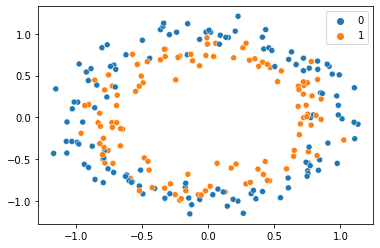

In [8]:
# create scatter plot for X_train circles from each class
sns.scatterplot(x= X_train_ci[:, 0], y= X_train_ci[:, 1], hue= y_train_ci, data=X_train_ci)

<AxesSubplot:>

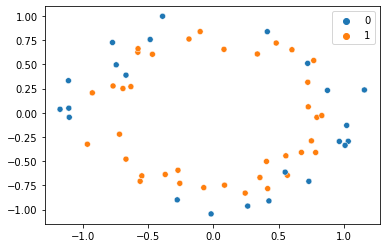

In [9]:
# create scatter plot for X_test circles from each class
sns.scatterplot(x= X_test_ci[:, 0], y= X_test_ci[:, 1], hue= y_test_ci, data=X_test_ci)

In [10]:
from sklearn.manifold import TSNE

tr2d = TSNE(n_components=2, n_jobs=-1).fit_transform(X_train_cl)
te2d = TSNE(n_components=2, n_jobs=-1).fit_transform(X_test_cl)

/home/shehata/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/shehata/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/shehata/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/shehata/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


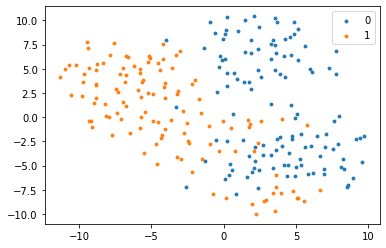

In [11]:
for label in np.unique(y_train_cl):
  plt.scatter(tr2d[y_train_cl == label, 0], tr2d[y_train_cl == label, 1], s= 8, label=label)
plt.legend()
plt.show()

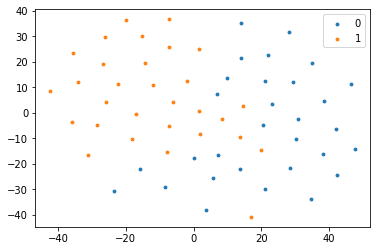

In [12]:
for label in np.unique(y_train_cl):
  plt.scatter(te2d[y_test_cl == label, 0], te2d[y_test_cl == label, 1], s=8, label=label)
plt.legend()
plt.show()

### Method to plot decision boundary

In [13]:
def plot_decision_boundary(X, y, classifier, title, resolution= 0.02):
    
    n_classes = len(set(y))
    plot_step = 0.02
    plot_colors = ['#F0FFFF','blue','purple']
    
    plt.figure(figsize=(4,3), dpi=100)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap= plt.cm.GnBu)

    plt.xlabel('X1')
    plt.ylabel('X2')

        # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0],
                    X[idx, 1],
                    c=color,
                    cmap=plt.cm.YlGnBu,
                    edgecolor='black',
                    s=10)
    plt.title(title)
    plt.axis("tight")


### Method to print model accuracy

In [14]:
def print_accuracy(model, y_test, y_pred, X_test):
    
    print('\nClassification Report:\n')
    print(classification_report(y_test, y_pred))
    print("---------------------------------------------\n")

    acc = accuracy_score(y_test, y_pred) 
    print("Accuracy: {:.2f}\n".format(acc))
    
    fig, ax = plt.subplots(figsize=(7, 7))
    print('\nConfusion Matrix:')
    plot_confusion_matrix(model, X_test, y_test,
                          xticks_rotation='horizontal',
                          ax=ax, cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.show()
    
    return acc 

# Decision Tree

## Q4 : 
 
 - Use Circle Dataset. Apply decision tree on the Circle Dataset
   - set criterion as gini and entropy
   - get the accuracy of the testing results
   - plot the decision boundaries as we showed in the following figure,
   - and explain the difference between these criterion

In [16]:
from sklearn.tree import DecisionTreeClassifier

def build_dt(crit, title):
    
    dt = DecisionTreeClassifier(random_state=0, criterion= crit)
    dt.fit(X_train_ci, y_train_ci)

    dt_pred = dt.predict(X_test_ci)

    print_accuracy(dt, y_test_ci, dt_pred, X_test_ci)
    plot_decision_boundary(X_test_ci, y_test_ci, dt, title)
    
    return dt, dt_pred

#### 1. Decision Tree with gini


Classification Report:

              precision    recall  f1-score   support

           0       0.56      0.65      0.60        23
           1       0.76      0.68      0.71        37

    accuracy                           0.67        60
   macro avg       0.66      0.66      0.66        60
weighted avg       0.68      0.67      0.67        60

---------------------------------------------

Accuracy: 0.67


Confusion Matrix:


/home/shehata/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


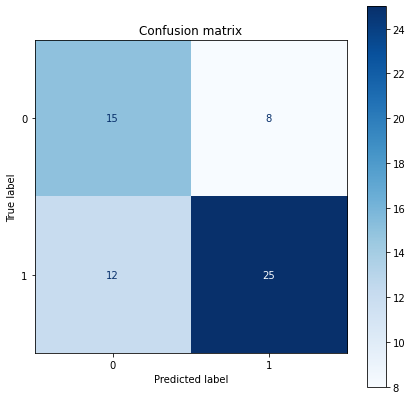

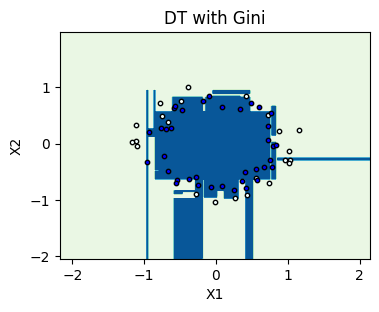

In [16]:
dt1, y_pred_dt1 = build_dt("gini", "DT with Gini")

#### Decision Tree with entropy


Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.61      0.65        23
           1       0.78      0.84      0.81        37

    accuracy                           0.75        60
   macro avg       0.74      0.72      0.73        60
weighted avg       0.75      0.75      0.75        60

---------------------------------------------

Accuracy: 0.75


Confusion Matrix:


/home/shehata/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


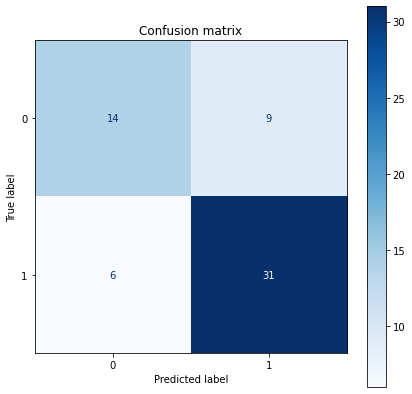

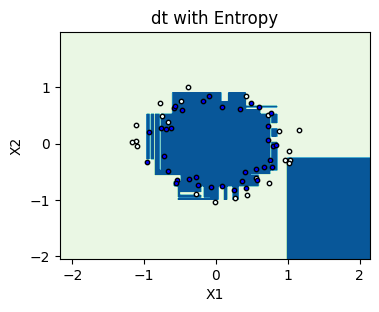

In [17]:
dt2, y_pred_dt2 = build_dt("entropy", "dt with Entropy")

- The **gini criterion** is much faster because it is less computationally expensive.

- On the other hand, the obtained results using the **entropy criterion** are slightly better.
  - as it add more complexity to the deision tree model due to log funtion

## Q5 :
 
 - Use Classification Dataset. 
   - Use training set to obtain the importance of features.
   - Plot Validation Accuracy (y-axis) vs Top K Important Feature (x-axis) curve;
     - where 4-fold cross validation should be used,
   - and also plot Test Accuracy vs Top K Important Feature curve

In [17]:
dt_cl = DecisionTreeClassifier(random_state=0, criterion= 'entropy')
dt_cl.fit(X_train_cl, y_train_cl)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Method to plot important features vs accuracies

In [18]:
def plot_importance_vs_accuracys(values, axis_values, title):
    
    plt.figure(figsize=(6,6))
    
    if len(axis_values) == 4:

        axis_1 = plt.plot(values, axis_values[0], color='cyan', marker='o', 
                         linestyle='dashdot', label = 'First fold')
        axis_2 = plt.plot(values, axis_values[1], color='black', marker='o',
                         linestyle='dashdot', label = 'Second fold')
        axis_3 = plt.plot(values, axis_values[2], color='blue', marker='o',
                         linestyle='dashdot', label = 'Third fold')
        axis_4 = plt.plot(values, axis_values[3], color='red', marker='o',
                         linestyle='dashdot', label = 'Fourth fold')
        
        plt.title(title)
        plt.xlabel('important Features')
        plt.ylabel('Accuracy %')
        plt.xticks([x for x in range(len(values))])
        y_ticks = [x for x in range(60,101,5)]
        plt.yticks(y_ticks)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
    else:
        axis1 = plt.plot(values, axis_values, color='red', marker='o', 
                         linestyle='dashdot')
        
        plt.title(title)
        plt.xlabel('important Features')
        plt.ylabel('Accuracy %')
        plt.xticks([x for x in range(len(values))])
        y_ticks = [x for x in range(80,101,2)]
        plt.yticks(y_ticks)

    plt.show

Feature: 0, Score: 0.17507
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.69196
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.02627
Feature: 17, Score: 0.04134
Feature: 18, Score: 0.06535
Feature: 19, Score: 0.00000


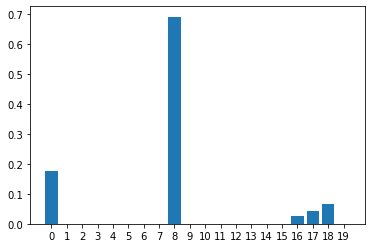

In [19]:
# get importance
importance = dt_cl.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}, Score: {:.5f}'.format(i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))])
plt.show()

In [21]:
# sort imartant features and invert it 
importance_sorted = np.argsort(importance, kind= 'quicksort')[::-1]

ims = importance_sorted[:7]

lst = []
for i in range(len(ims)):
    im_features = ims[0: (i+1)]
    lst.append(im_features)

In [28]:
valid_acc = []
test_acc =[]
X_test_cll = pd.DataFrame(X_test_cl)

dt_model = DecisionTreeClassifier(random_state=0, criterion= 'entropy')

for i in lst:
    cv_acc = cross_validate(dt_model, X_train_cl[:,i], y_train_cl, cv = 4)
#     print(cv_acc)
    valid_acc.append(cv_acc['test_score']*100)
    
    dt_model.fit(X_train_cl[:, i], y_train_cl)
    y_preds = dt_model.predict(X_test_cll.iloc[:, i])
    test_accuracy =  accuracy_score(y_test_cl, y_preds)
    test_acc.append(test_accuracy* 100)
    
cv_acc = list(map(list, zip(*valid_acc)))

#### Plot Fold Accuracy vs Top K features

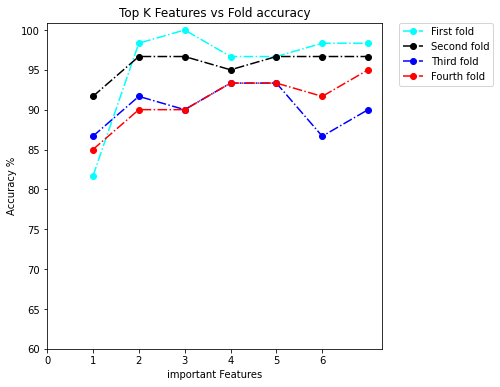

In [29]:
values = [x for x in range(1,8)]
plot_importance_vs_accuracys(values[:8], cv_acc,
                             "Top K Features vs Fold accuracy")

#### Plot Test Accuracy vs Top K features

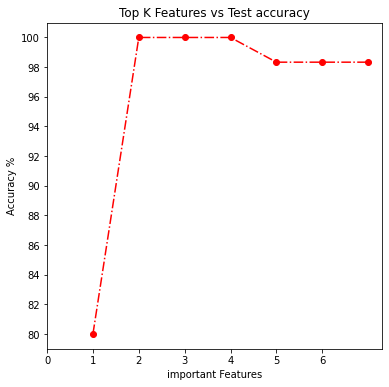

In [30]:
plot_importance_vs_accuracys(values[:8], test_acc,
                             "Top K Features vs Test accuracy")

# Bagging

 - Bagging is to generate a set of bootstrap datasets,
 - create estimators for each bootstrap dataset,
 - and finally utilize majority voting (soft or hard) to get the final decision.

## Q6 : 
  
 - Use Circle Dataset. Set the number of estimators as 2, 5, 15, 20 respectively,
 - and generate the results accordingly (i.e., accuracy and decision boundary)


Model: 1

Classification Report:

              precision    recall  f1-score   support

           0       0.49      0.83      0.61        23
           1       0.81      0.46      0.59        37

    accuracy                           0.60        60
   macro avg       0.65      0.64      0.60        60
weighted avg       0.69      0.60      0.60        60

---------------------------------------------

Accuracy: 0.60


Confusion Matrix:


/home/shehata/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


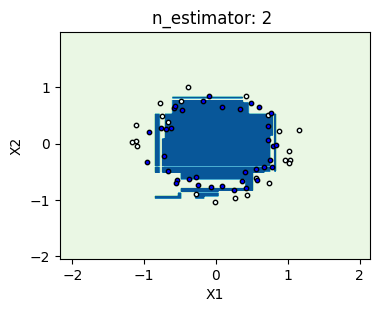

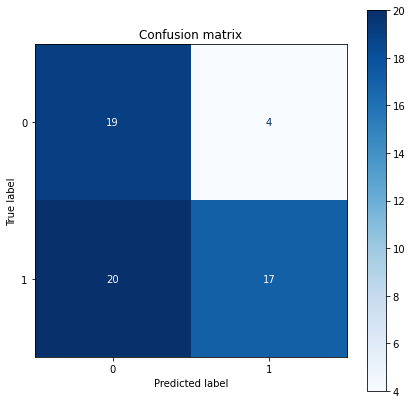

----------------------------------------------------------

Model: 2

Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.70      0.68        23
           1       0.81      0.78      0.79        37

    accuracy                           0.75        60
   macro avg       0.74      0.74      0.74        60
weighted avg       0.75      0.75      0.75        60

---------------------------------------------

Accuracy: 0.75


Confusion Matrix:


/home/shehata/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


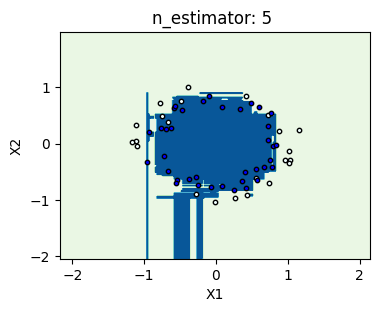

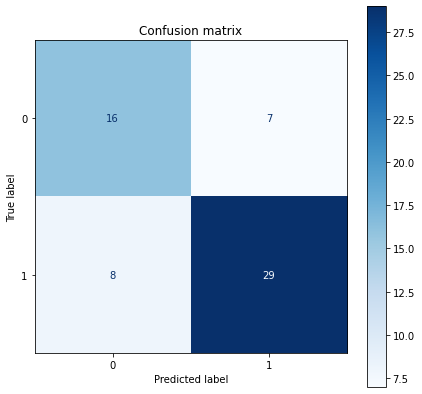

----------------------------------------------------------

Model: 3

Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.65      0.64        23
           1       0.78      0.76      0.77        37

    accuracy                           0.72        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.72      0.72      0.72        60

---------------------------------------------

Accuracy: 0.72


Confusion Matrix:


/home/shehata/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


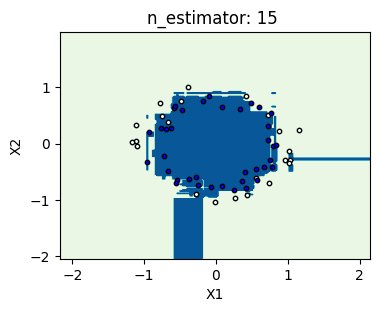

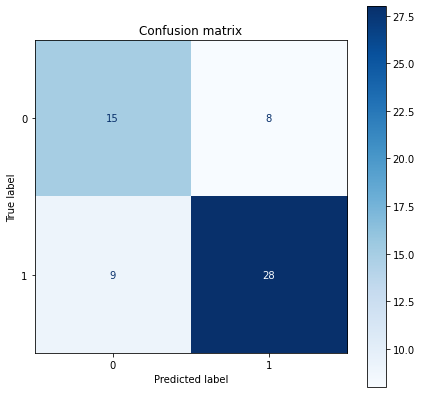

----------------------------------------------------------

Model: 4

Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.74      0.69        23
           1       0.82      0.76      0.79        37

    accuracy                           0.75        60
   macro avg       0.74      0.75      0.74        60
weighted avg       0.76      0.75      0.75        60

---------------------------------------------

Accuracy: 0.75


Confusion Matrix:


/home/shehata/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


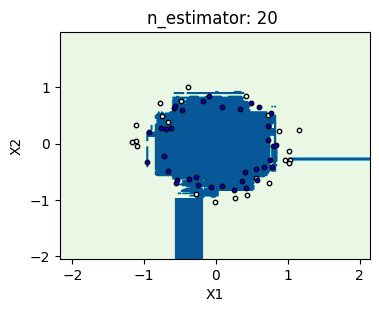

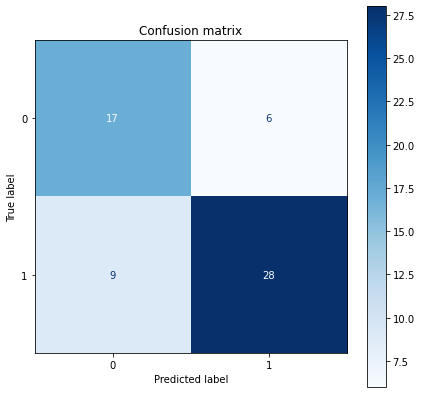

----------------------------------------------------------


In [17]:
from sklearn.ensemble import BaggingClassifier
# base_estimator = DecisionTreeClassifier

c = 1
n_estimators = [2, 5, 15, 20]
for i in n_estimators:
    bc_model = BaggingClassifier(n_estimators = i, random_state=0)
    bc_model.fit(X_train_ci, y_train_ci)
    
    bc_pred = bc_model.predict(X_test_ci)
    
    print("\nModel: {}".format(c))
    title_bc = "n_estimator: {} ".format(i)
    plot_decision_boundary(X_test_ci, y_test_ci, bc_model, title_bc)
    
    print_accuracy(bc_model, y_test_ci, bc_pred, X_test_ci)
    print("----------------------------------------------------------")
    
    c += 1

## Q7 : In Report 

 - Explain why bagging can reduce the variance and mitigate the overfitting problem

# Random Forest

## Q8 :

 - Use Circle Dataset. Set the number of estimators as 2, 5, 15, 20 respectively,
 - and generate the results accordingly (i.e., accuracy and decision boundary)


Model: 1

Classification Report:

              precision    recall  f1-score   support

           0       0.52      0.74      0.61        23
           1       0.78      0.57      0.66        37

    accuracy                           0.63        60
   macro avg       0.65      0.65      0.63        60
weighted avg       0.68      0.63      0.64        60

---------------------------------------------

Accuracy: 0.63


Confusion Matrix:


/home/shehata/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


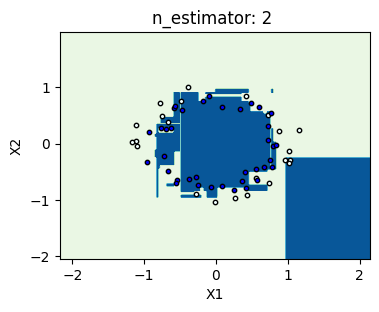

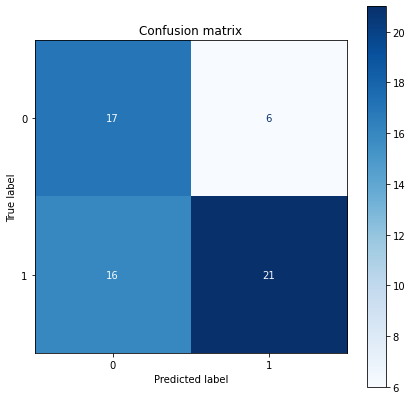

-------------------------------------------------------

Model: 2

Classification Report:

              precision    recall  f1-score   support

           0       0.56      0.61      0.58        23
           1       0.74      0.70      0.72        37

    accuracy                           0.67        60
   macro avg       0.65      0.66      0.65        60
weighted avg       0.67      0.67      0.67        60

---------------------------------------------

Accuracy: 0.67


Confusion Matrix:


/home/shehata/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


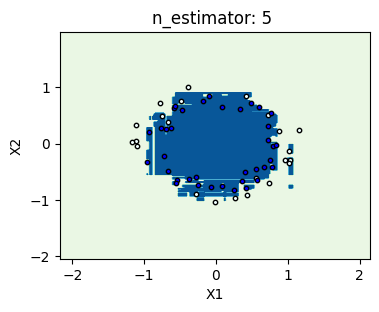

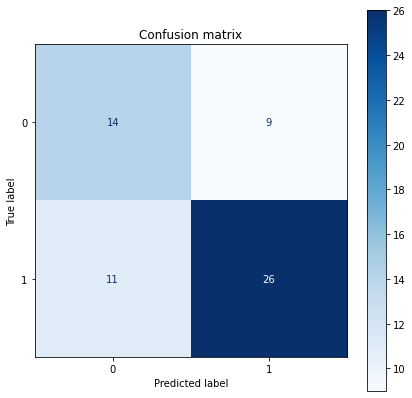

-------------------------------------------------------

Model: 3

Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.74      0.68        23
           1       0.82      0.73      0.77        37

    accuracy                           0.73        60
   macro avg       0.72      0.73      0.73        60
weighted avg       0.75      0.73      0.74        60

---------------------------------------------

Accuracy: 0.73


Confusion Matrix:


/home/shehata/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


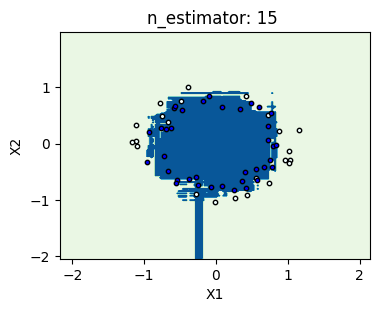

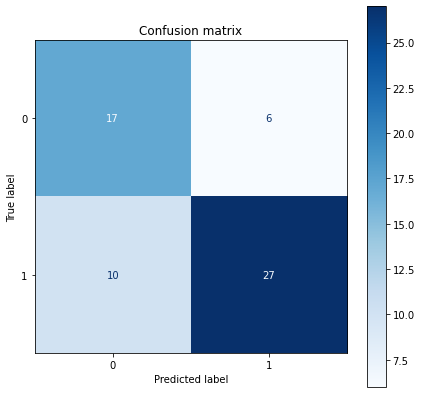

-------------------------------------------------------

Model: 4

Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.74      0.69        23
           1       0.82      0.76      0.79        37

    accuracy                           0.75        60
   macro avg       0.74      0.75      0.74        60
weighted avg       0.76      0.75      0.75        60

---------------------------------------------

Accuracy: 0.75


Confusion Matrix:


/home/shehata/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


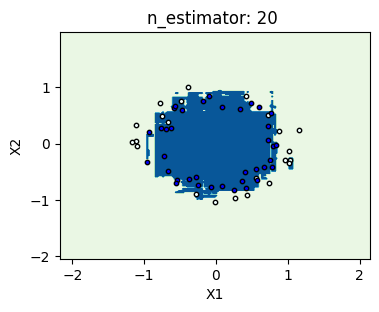

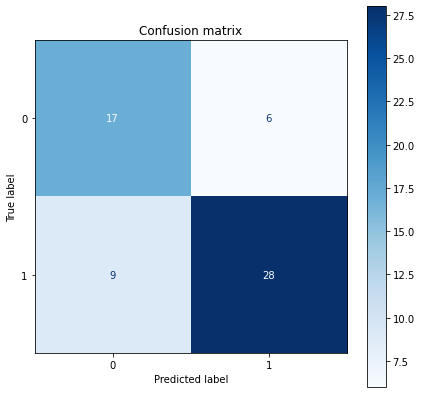

-------------------------------------------------------


In [21]:
from sklearn.ensemble import RandomForestClassifier as RF
n_estimators = [2, 5, 15, 20]
c = 1
for i in n_estimators:
    rf_model = RF(n_estimators = i)
    rf_model.fit(X_train_ci, y_train_ci)
    
    rf_pred = rf_model.predict(X_test_ci)
    
    print("\nModel: {}".format(c))
    title_rf = "n_estimator: {} ".format(i)
    plot_decision_boundary(X_test_ci, y_test_ci, rf_model, title_rf)
    print_accuracy(rf_model, y_test_ci, rf_pred, X_test_ci)
   
    print("-------------------------------------------------------")
    c += 1

## Q9 : In Report

 - Compare with bagging results and explain the difference between Bagging and Random Forest

# Boosting

## Q10 : 

  - Use Circle Dataset. There are 2 important hyperparameters in AdaBoost,
    - i.e., the number of estimators (ne), and learning rate (lr).
  - Please plot 12 subfigures as the following table's setup.
    - Each figure should plot the decision boundary
    - and each of their title should be the same format as {n_estimaotrs}, {learning_rate}, {accuracy}

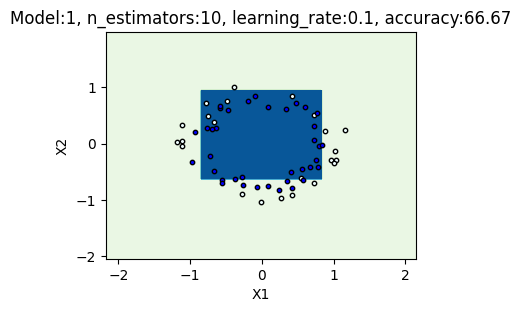

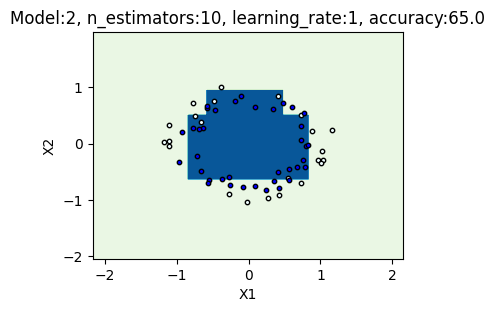

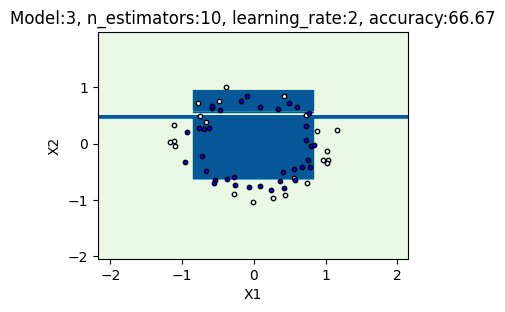

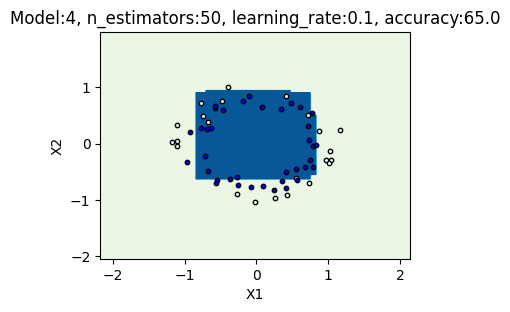

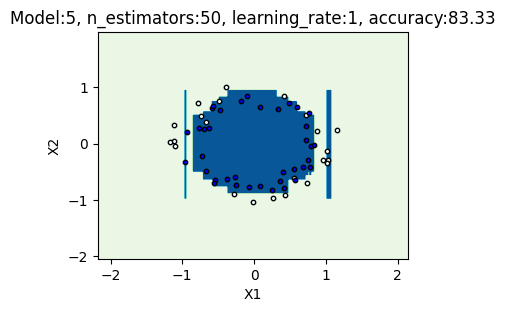

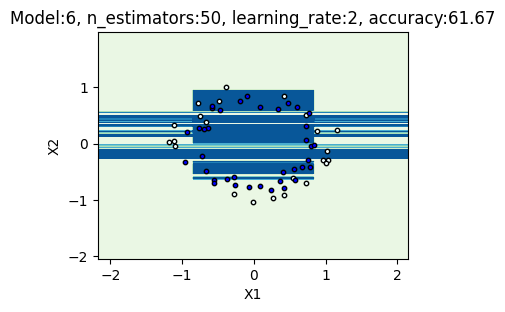

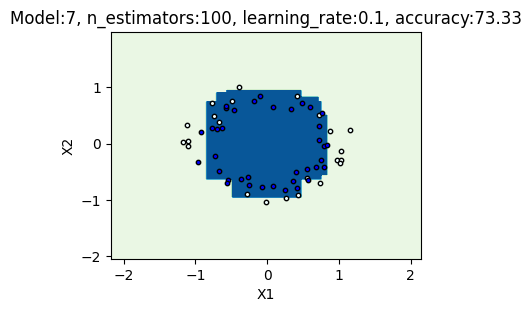

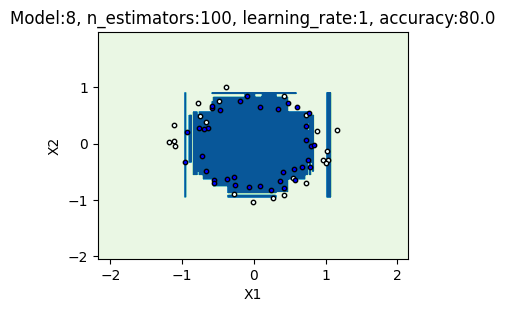

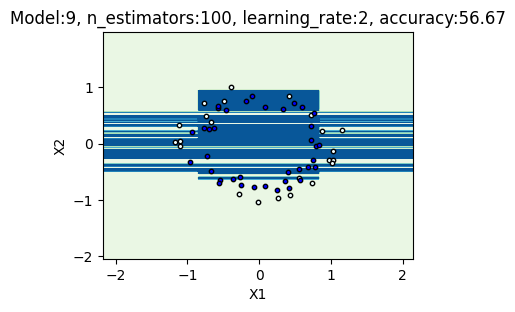

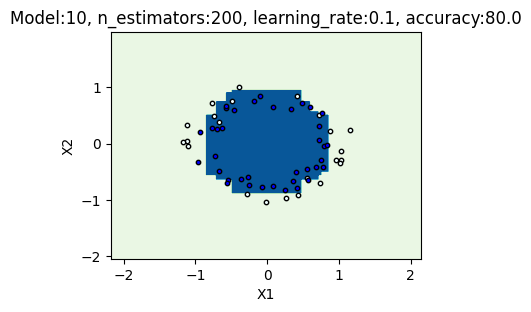

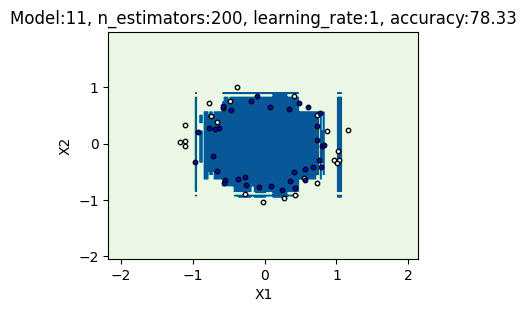

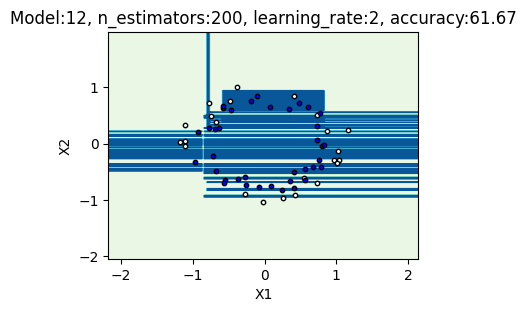

In [22]:
from sklearn.ensemble import AdaBoostClassifier

n_estimators = [10, 50, 100, 200]
lr = [0.1, 1, 2]

count = 1
for i in n_estimators:
    for j in lr:
        ada_model = AdaBoostClassifier(n_estimators= i, learning_rate= j)
        
        ada_model.fit(X_train_ci, y_train_ci)
        
        ada_pred = ada_model.predict(X_test_ci)
        acc = round(accuracy_score(y_test_ci, ada_pred) * 100, 2)
        
#         print_accuracy(ada_model, y_test_ci, ada_pred, X_test_ci)
        title_ada = "Model:{}, n_estimators:{}, learning_rate:{}, accuracy:{}".format(count, i, j, acc)
        plot_decision_boundary(X_test_ci, y_test_ci, ada_model, title_ada)
        
        count += 1

# Stacking

## Q11 :

  - We have tuned the Decision Tree, Bagging, Random Forest, and AdaBoost in the previous section.
  - Use these fine tuned model as base estimators 
    - use
       - Naive Bayes
       - Logistic Regression
       - Decision Tree
      as aggregators to generate the results accordingly
    - (i.e., accuracy and decision boundary)


Stacking with: Decision Tree

Classification Report:

              precision    recall  f1-score   support

           0       0.55      0.70      0.62        23
           1       0.77      0.65      0.71        37

    accuracy                           0.67        60
   macro avg       0.66      0.67      0.66        60
weighted avg       0.69      0.67      0.67        60

---------------------------------------------

Accuracy: 0.67


Confusion Matrix:


/home/shehata/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


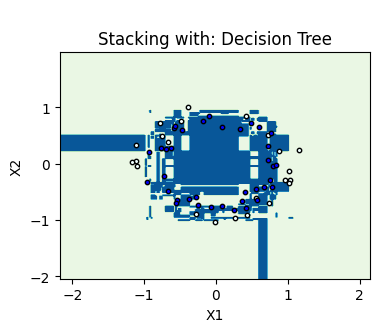

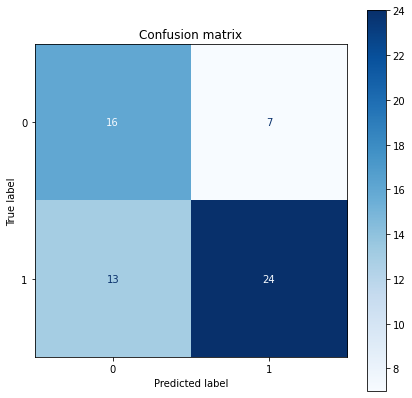

-----------------------------------------------------------

Stacking with: Logistic Regression

Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.74      0.68        23
           1       0.82      0.73      0.77        37

    accuracy                           0.73        60
   macro avg       0.72      0.73      0.73        60
weighted avg       0.75      0.73      0.74        60

---------------------------------------------

Accuracy: 0.73


Confusion Matrix:


/home/shehata/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


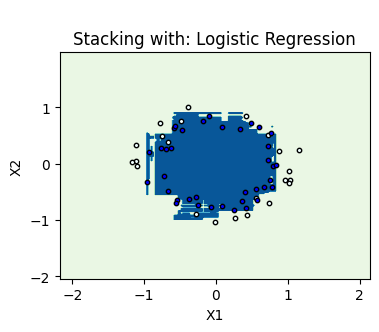

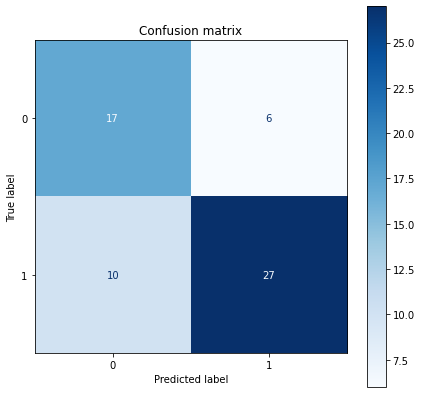

-----------------------------------------------------------

Stacking with: Naive Bayes

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.65      0.71        23
           1       0.80      0.89      0.85        37

    accuracy                           0.80        60
   macro avg       0.80      0.77      0.78        60
weighted avg       0.80      0.80      0.80        60

---------------------------------------------

Accuracy: 0.80


Confusion Matrix:


/home/shehata/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


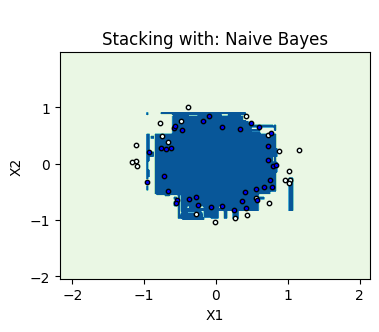

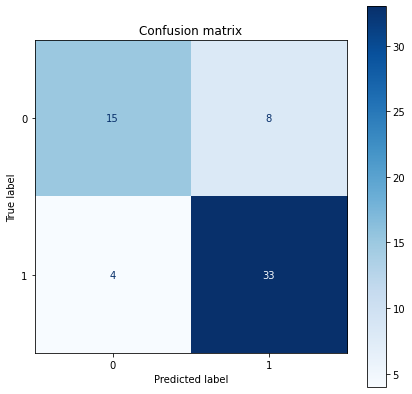

-----------------------------------------------------------


In [389]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

estimators = [ 
     ('DT', DecisionTreeClassifier(random_state=0, criterion= 'entropy')),
     ('BC', BaggingClassifier(n_estimators = 5, random_state=0)),
     ('RF', RF(n_estimators = 2)),
     ('ADA', AdaBoostClassifier(n_estimators= 50, learning_rate= 1))]

aggregators = [
    DecisionTreeClassifier(random_state=0, criterion= 'entropy'),
    LogisticRegression(),
    GaussianNB()]

titles = ["Decision Tree", "Logistic Regression", "Naive Bayes"]

for i, j in enumerate(aggregators):
    stack_model = StackingClassifier(estimators= estimators, final_estimator=j)
    stack_model.fit(X_train_ci, y_train_ci)
    stack_pred = stack_model.predict(X_test_ci)
    
    acc = round(accuracy_score(y_test_ci, stack_pred) * 100, 3)
    print("\nStacking with: {}".format(titles[i]))
    stack_title = "\nStacking with: {}".format(titles[i])
    plot_decision_boundary(X_test_ci, y_test_ci, stack_model, stack_title)
    print_accuracy(stack_model, y_test_ci, stack_pred, X_test_ci)
    print("-----------------------------------------------------------")